In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# image_info = pd.read_excel('./image_info.xls')

In [2]:
import datetime

In [3]:
image_info = pd.read_csv('./train_data_multiprocess.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
image_info.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,28073,QMZZ015-横版CHL（口播）,16,2020-12-25,377.0,4914.72,1.0,16.0,6.0,10.0,0.0625,307.170000,4914.72,0.0,0.0,0.0,0.0,0.001221,0.0455,6.0,2021-05-01,3
1,28164,GZDGB10,10,2020-12-27,25.0,647.31,1.0,2.0,6.0,8.0,0.5000,323.655000,647.31,0.0,0.0,0.0,0.0,0.009269,0.2727,12.0,2021-05-01,3
2,28237,gzdgBG04,10,2020-12-29,165.0,167.74,0.0,0.0,0.0,1.0,0.0000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2021-05-01,3
3,28239,gzdgBG18,10,2020-12-29,827.0,2594.60,0.0,17.0,0.0,16.0,0.0000,152.623529,0.00,0.0,0.0,0.0,0.0,0.000000,0.2321,1688.0,2021-05-01,3
4,28416,（Q）GZDGS029-LZQ 怀旧复古（微信640X360）,16,2020-12-30,57.0,132.33,0.0,0.0,0.0,3.0,0.0000,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,2021-05-01,3


In [6]:
image_info['image_id'].nunique()

3213

In [7]:
image_info['image_30_roi'] = image_info['create_role_30_pay_sum'] / image_info['image_run_date_amount']

In [8]:
image_info.corr()['image_30_roi'].sort_values(ascending=False)

image_30_roi                   1.000000
image_create_role_roi          0.238175
create_role_30_pay_sum         0.203534
image_pay_sum_ability          0.058686
image_create_role_pay_rate     0.058353
image_create_role_retain_1d    0.042217
image_create_role_pay_sum      0.038738
image_valid_source_rate        0.022856
image_source_total_num         0.011114
media_id                       0.010510
image_pay_num_ability          0.007420
image_valid_source_num         0.006885
image_create_role_pay_num      0.002174
image_create_role_num         -0.003259
image_run_date_amount         -0.003454
image_source_num              -0.005132
image_id                      -0.005684
image_create_role_pay_cost    -0.006566
image_create_role_cost        -0.013941
data_win                            NaN
Name: image_30_roi, dtype: float64

In [9]:
image_info['label'] = image_info['image_30_roi'].apply(lambda x:1 if x>=0.35 else(0 if x<0.25 else 2))

In [10]:
image_info['label'].value_counts()

0    69053
1     9558
2     6278
Name: label, dtype: int64

In [11]:
image_info_label = image_info[image_info['label']!=2]

### EDA

In [12]:
image_info_label.shape

(78611, 24)

In [13]:
image_info_label = image_info_label[image_info_label['image_run_date_amount']>=500]

In [14]:
image_info_label.shape

(60032, 24)

In [15]:
image_info_label.nunique().sort_values()

data_win                           1
label                              2
media_id                           4
image_valid_source_num            64
image_source_num                 100
image_create_role_pay_num        133
image_source_total_num           226
model_run_datetime               277
image_launch_time                351
image_valid_source_rate          389
image_pay_num_ability            506
image_create_role_num           1132
image_create_role_pay_rate      1299
image_create_role_retain_1d     2588
image_id                        2908
image_name                      2908
image_pay_sum_ability           2920
image_create_role_pay_sum       2947
create_role_30_pay_sum          8520
image_create_role_roi          21308
image_create_role_pay_cost     31765
image_30_roi                   40473
image_run_date_amount          55251
image_create_role_cost         56078
dtype: int64

In [16]:
image_info_label.drop(['data_win','image_30_roi','image_valid_source_num','image_pay_sum_ability','image_pay_num_ability'], axis=1, inplace=True)

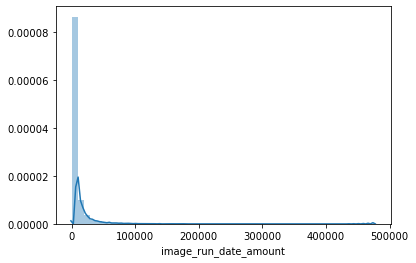

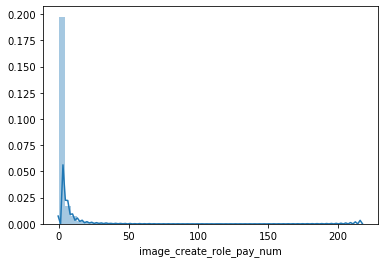

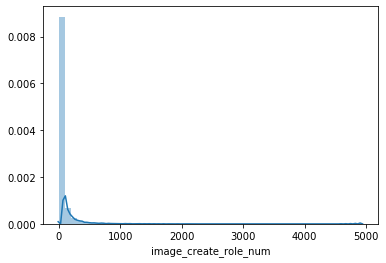

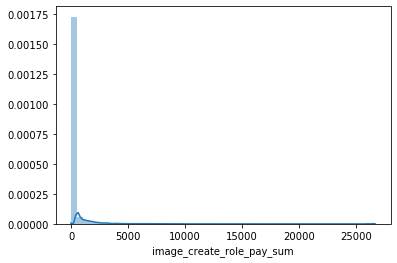

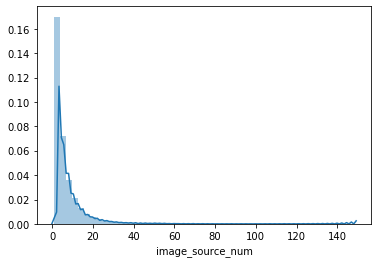

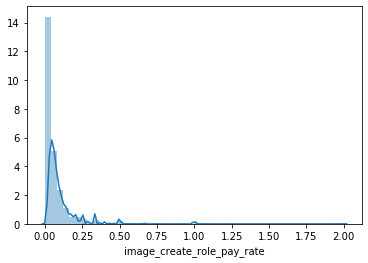

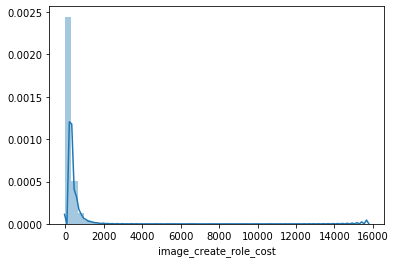

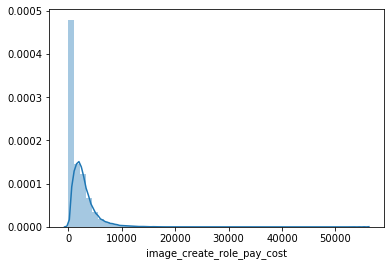

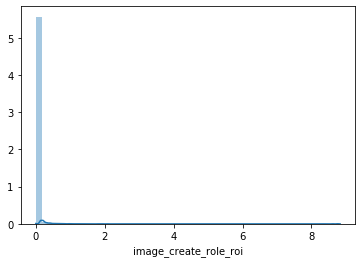

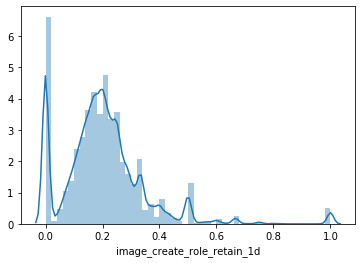

In [17]:
columns = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_create_role_roi', 'image_create_role_retain_1d']
for col in columns:
    sns.distplot(image_info_label[col])
    plt.show()

In [18]:
image_info_label[image_info_label['image_create_role_cost']>=800].shape

(2465, 19)

In [19]:
image_info_label = image_info_label[image_info_label['image_create_role_cost']<800]

In [20]:
image_info_label['image_create_role_cost'].replace(0,float('inf'),inplace=True)

In [21]:
image_info_label['image_create_role_pay_cost'].replace(0,float('inf'),inplace=True)

In [22]:
image_info_label['image_create_role_pay_cost'].value_counts().sort_index()

1.565625e+02        1
1.622550e+02        1
1.686200e+02        1
1.748867e+02        1
1.774275e+02        1
                ...  
2.618359e+04        1
3.187267e+04        1
3.705534e+04        1
3.876659e+04        1
inf             25348
Name: image_create_role_pay_cost, Length: 31338, dtype: int64

In [23]:
image_info_label = image_info_label[image_info_label['image_create_role_pay_cost']>500]

In [24]:
image_info_label.shape

(57161, 19)

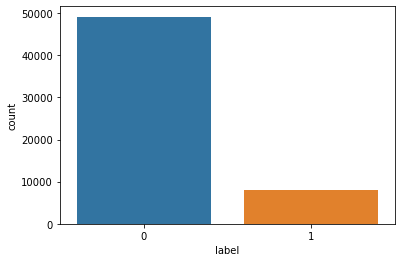

In [25]:
sns.countplot(x='label',data=image_info_label)
plt.show()

In [26]:
image_info_label['media_id'].value_counts()

10    29219
16    20604
45     6447
32      891
Name: media_id, dtype: int64

In [27]:
#多变量分析
image_info_label.corr()

,image_id,media_id,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_rate,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,label
image_id,1.000000,0.101367,-0.234552,-0.005861,-0.010816,-0.055274,-0.024035,-0.023296,-0.001137,0.093543,0.045730,-0.015793,-0.027224,0.026817,-0.032805,-0.054119
media_id,0.101367,1.000000,-0.074415,-0.144351,-0.095836,-0.108654,-0.061665,-0.204210,-0.005266,-0.184624,-0.203590,0.152093,0.042788,-0.002193,-0.063441,-0.005777
image_source_total_num,-0.234552,-0.074415,1.000000,0.315317,0.277413,0.260786,0.204901,0.305480,0.021536,-0.109465,0.070652,0.016582,0.021679,0.046402,0.218557,0.165614
image_run_date_amount,-0.005861,-0.144351,0.315317,1.000000,0.932297,0.834089,0.684581,0.561659,0.025561,-0.120448,0.096398,0.012963,0.034652,-0.002327,0.568586,0.207549
image_create_role_pay_num,-0.010816,-0.095836,0.277413,0.932297,1.000000,0.819905,0.678556,0.469499,0.103171,-0.152813,-0.098824,0.156127,0.058855,0.011401,0.528318,0.215479
image_create_role_num,-0.055274,-0.108654,0.260786,0.834089,0.819905,1.000000,0.557308,0.424103,-0.024461,-0.237462,0.030698,0.055124,0.025284,-0.048096,0.456867,0.163349
image_create_role_pay_sum,-0.024035,-0.061665,0.204901,0.684581,0.678556,0.557308,1.000000,0.376705,0.066711,-0.076380,-0.030693,0.059619,0.338397,0.014778,0.649695,0.319335
image_source_num,-0.023296,-0.204210,0.305480,0.561659,0.469499,0.424103,0.376705,1.000000,0.026373,-0.017334,0.178788,-0.095928,0.028354,0.000275,0.331875,0.162684
image_create_role_pay_rate,-0.001137,-0.005266,0.021536,0.025561,0.103171,-0.024461,0.066711,0.026373,1.000000,0.151024,-0.397047,0.397530,0.193227,0.264483,0.041944,0.140963
image_create_role_cost,0.093543,-0.184624,-0.109465,-0.120448,-0.152813,-0.237462,-0.076380,-0.017334,0.151024,1.000000,0.172625,-0.165870,-0.028814,0.091761,-0.074318,-0.090496


In [28]:
#特征选择,woe分箱
from scipy import stats
def monoto_bin(Y, X, n = 20):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    while np.abs(r) < 0.9:
        d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='raise')})
        d2 = d1.groupby('Bucket', as_index = True)
        r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        n = n - 1
#     print(r)
#     print(n)
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
    cut = []
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua =X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    woe = list(d4['woe'].round(3))
    return d4,iv,cut,woe

In [29]:
dfx1,ivx1,cutx1,woex1 = monoto_bin(image_info_label['label'],image_info_label['image_run_date_amount'],n=10)
# dfx2,ivx2,cutx2,woex2 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],n=10)
dfx3,ivx3,cutx3,woex3 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_num'],n=10)
# dfx4,ivx4,cutx4,woex4 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],n=10)
# dfx5,ivx5,cutx5,woex5 = monoto_bin(image_info_label['label'],image_info_label['image_source_num'],n=10)
# dfx6,ivx6,cutx6,woex6 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],n=10)
# dfx7,ivx7,cutx7,woex7 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_cost'],n=10)
# dfx8,ivx8,cutx8,woex8 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],n=10)
# dfx9,ivx9,cutx9,woex9 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_roi'],n=10)
# dfx10,ivx10,cutx10,woex10 = monoto_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],n=10)

[0.903, 0.749, 0.622, 0.533, 0.348, 0.172, -0.067, -0.239, -0.544, -1.139]


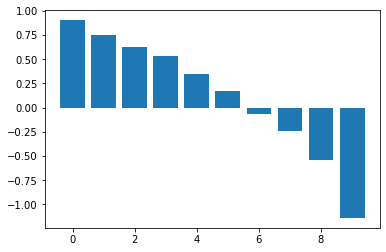

[1.148, 0.738, 0.587, 0.423, 0.29, 0.044, -0.025, -0.357, -0.609, -1.028]


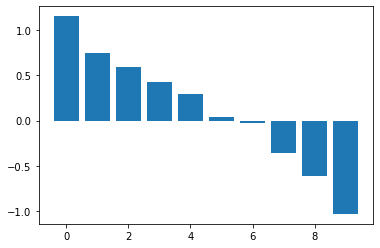

In [30]:
woex = [woex1,woex3]
for col in woex:
    print('{}'.format(col))
    plt.bar(range(len(col)),col)
    plt.show()

In [31]:
def self_bin(Y, X, bin):
    r = 0
    total_bad = Y.sum()
    total_good =Y.count()-total_bad  
    d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, bin)})
    d2 = d1.groupby('Bucket', as_index = True)
    r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
        
    d3 = pd.DataFrame(d2.min().X, columns = ['min_' + X.name])
    d3['min_' + X.name] = d2.min().X
    d3['max_' + X.name] = d2.max().X
    d3[Y.name] = d2.sum().Y
    d3['total'] = d2.count().Y
    #d3[Y.name + '_rate'] = d2.mean().Y
    #好坏比，求woe,证据权重，自变量对目标变量有没有影响，什么影响
    d3['badattr']=d3[Y.name]/total_bad
    d3['goodattr']=(d3['total']-d3[Y.name])/total_good
    d3['woe'] = np.log(d3['goodattr']/d3['badattr'])
    #iv，信息值，自变量对于目标变量的影响程度
    iv = ((d3['goodattr']-d3['badattr'])*d3['woe']).sum()
    d4 = (d3.sort_values(by = 'min_' + X.name)).reset_index(drop = True)
    print ("=" * 80)
#     print (d4)
    woe = list(d4['woe'].round(3))
    return d4,iv,woe

In [32]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
cutx2 = [ninf, 1, 3, 8, 12,50,pinf]
cutx4 = [ninf,60,100,300,600,1000,4000,pinf]
cutx5 = [ninf,1,3,6,10,50,pinf]
cutx6 = [ninf,0.01,0.025,0.05,0.075,pinf]
cutx7 = [ninf, 50,100,150,200,300,400,pinf]
cutx8 = [ninf, 2000,3000,4000,6000,8000,10000,pinf]
cutx9 = [ninf, 0.01, 0.02, 0.03, 0.05,pinf]
cutx10 = [ninf, 0.1, 0.2, 0.3, 0.4,0.6, pinf]

In [33]:
dfx2,ivx2,woex2 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_num'],cutx2)
dfx4,ivx4,woex4 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_sum'],cutx4)
dfx5,ivx5,woex5 = self_bin(image_info_label['label'],image_info_label['image_source_num'],cutx5)
dfx6,ivx6,woex6 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_rate'],cutx6)
dfx7,ivx7,woex7 = self_bin(image_info_label['label'],image_info_label['image_create_role_cost'],cutx7)
dfx8,ivx8,woex8 = self_bin(image_info_label['label'],image_info_label['image_create_role_pay_cost'],cutx8)
dfx9,ivx9,woex9 = self_bin(image_info_label['label'],image_info_label['image_create_role_roi'],cutx9)
dfx10,ivx10,woex10 = self_bin(image_info_label['label'],image_info_label['image_create_role_retain_1d'],cutx10)
# dfx11,ivx11,woex11 = self_bin(image_info_label['label'],image_info_label['image_pay_num_ability'],cutx11)
# dfx12,ivx12,woex12 = self_bin(image_info_label['label'],image_info_label['image_create_role_roi'],cutx12)

In [34]:
for i in range(1,11):
    exec("print('woex%s =',woex%s)"%(i,i))

woex1 = [0.903, 0.749, 0.622, 0.533, 0.348, 0.172, -0.067, -0.239, -0.544, -1.139]
woex2 = [0.666, -0.361, -0.807, -1.168, -1.446, -2.085]
woex3 = [1.148, 0.738, 0.587, 0.423, 0.29, 0.044, -0.025, -0.357, -0.609, -1.028]
woex4 = [0.799, -0.125, -0.587, -1.181, -1.593, -2.195, -3.37]
woex5 = [0.369, 0.343, 0.083, -0.179, -0.684, -1.42]
woex6 = [1.152, -0.099, -0.425, -0.643, -0.568]
woex7 = [0.241, -0.201, -0.241, -0.264, 0.09, 0.332, 0.818]
woex8 = [-0.631, -0.62, -0.51, -0.239, 0.016, 0.124, 1.146]
woex9 = [0.785, -0.234, -0.729, -1.114, -2.194]
woex10 = [1.857, -0.009, -0.477, -0.151, -0.057, 0.113]


In [35]:
for i in range(1,11):
    exec("print('cutx%s =',cutx%s)"%(i,i))

cutx1 = [-inf, 709.48, 1012.45, 1441.55, 2018.45, 2840.72, 4061.22, 5963.83, 9426.32, 17642.13, inf]
cutx2 = [-inf, 1, 3, 8, 12, 50, inf]
cutx3 = [-inf, 3.0, 5.0, 7.0, 11.0, 16.0, 24.0, 38.0, 63.0, 133.0, inf]
cutx4 = [-inf, 60, 100, 300, 600, 1000, 4000, inf]
cutx5 = [-inf, 1, 3, 6, 10, 50, inf]
cutx6 = [-inf, 0.01, 0.025, 0.05, 0.075, inf]
cutx7 = [-inf, 50, 100, 150, 200, 300, 400, inf]
cutx8 = [-inf, 2000, 3000, 4000, 6000, 8000, 10000, inf]
cutx9 = [-inf, 0.01, 0.02, 0.03, 0.05, inf]
cutx10 = [-inf, 0.1, 0.2, 0.3, 0.4, 0.6, inf]


In [36]:
image_info_label['image_create_role_roi'].describe()

count    57161.000000
mean         0.019324
std          0.108024
min          0.000000
25%          0.000000
50%          0.001484
75%          0.011283
max          8.828950
Name: image_create_role_roi, dtype: float64

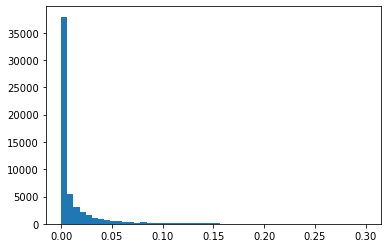

In [37]:
plt.hist(image_info_label['image_create_role_roi'],bins=50,range=(0,0.3))
plt.show()

[0.903, 0.749, 0.622, 0.533, 0.348, 0.172, -0.067, -0.239, -0.544, -1.139]


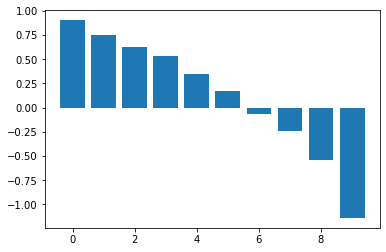

[0.666, -0.361, -0.807, -1.168, -1.446, -2.085]


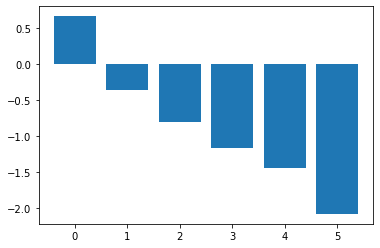

[1.148, 0.738, 0.587, 0.423, 0.29, 0.044, -0.025, -0.357, -0.609, -1.028]


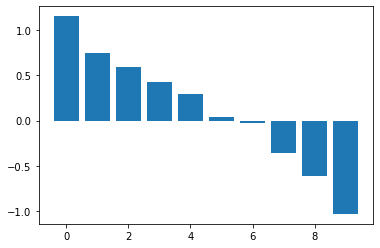

[0.799, -0.125, -0.587, -1.181, -1.593, -2.195, -3.37]


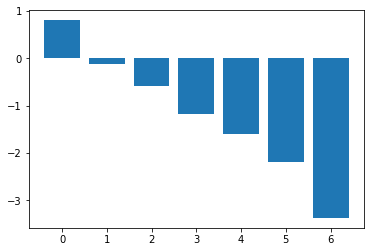

[0.369, 0.343, 0.083, -0.179, -0.684, -1.42]


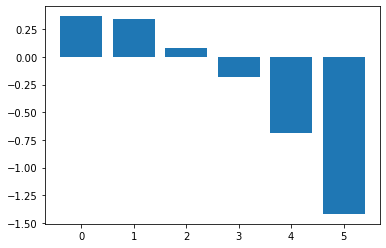

[1.152, -0.099, -0.425, -0.643, -0.568]


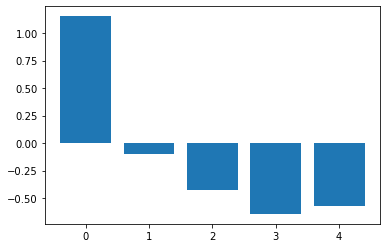

[0.241, -0.201, -0.241, -0.264, 0.09, 0.332, 0.818]


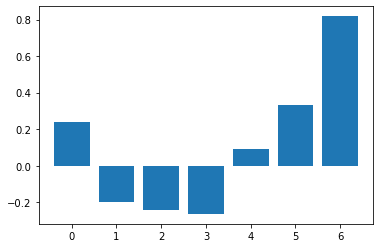

[-0.631, -0.62, -0.51, -0.239, 0.016, 0.124, 1.146]


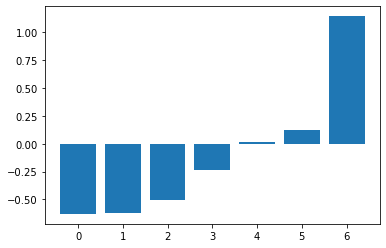

[0.785, -0.234, -0.729, -1.114, -2.194]


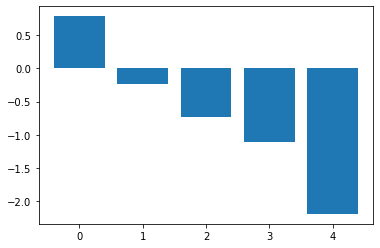

[1.857, -0.009, -0.477, -0.151, -0.057, 0.113]


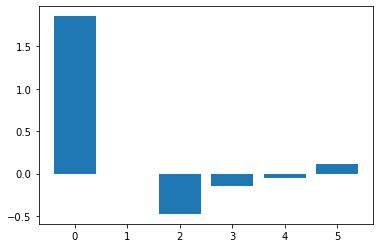

In [38]:
woex = [woex1,woex2,woex3,woex4,woex5,woex6,woex7,woex8,woex9,woex10]
for col in woex:
    print('{}'.format(col))
    plt.bar(range(len(col)),col)
    plt.show()

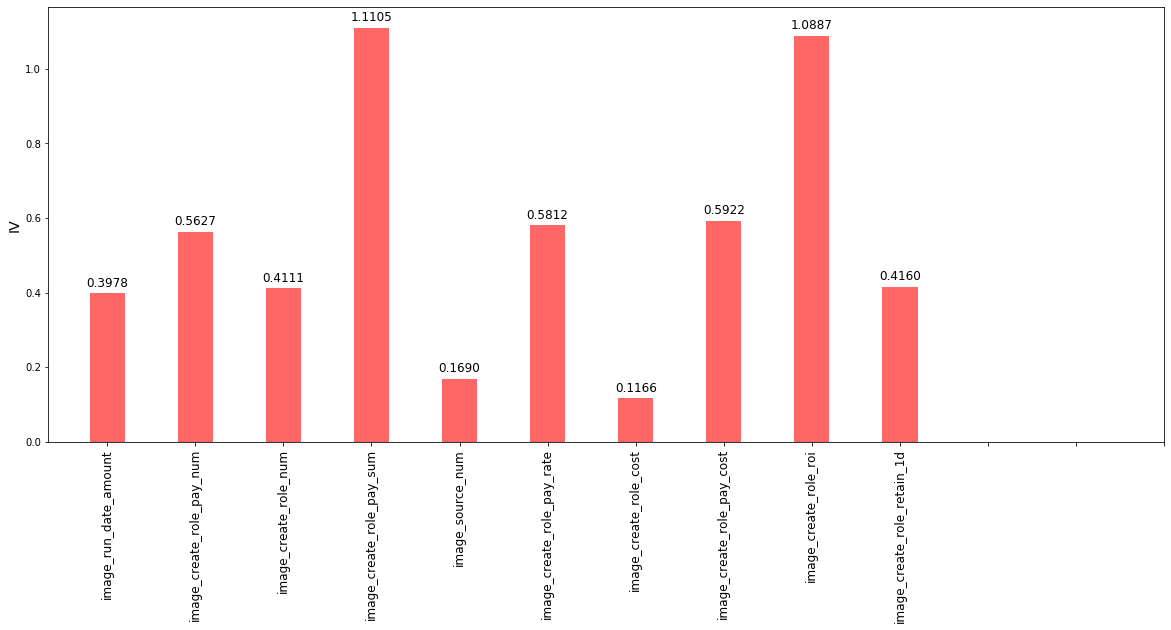

In [40]:
y=[ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10]
index=['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_create_role_roi','image_create_role_retain_1d']
fig= plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(range(1,11), y, width=0.4,color = 'r',alpha = 0.6)#生成柱状图
ax1.set_xticks(range(1,14))
ax1.set_xticklabels(index, rotation=90, fontsize=12)
ax1.set_ylabel('IV', fontsize=14)
#在柱状图上添加数字标签
for i, v in enumerate(y):
    plt.text(i+1, v+0.01, '%.4f' % v, ha='center', va='bottom', fontsize=12)
plt.show()

In [41]:
"""
根据IV值判断变量预测能力的标准:
< 0.02： useless for predition
0.02-0.1： weak predictor
0.1-0.3： medium predictor
0.3-0.5： strong predictor
大于0.5： suspicious or too good to be true
"""
#删除掉iv小于0.1的变量
select_feature = ['image_run_date_amount', 'image_create_role_pay_num',
       'image_create_role_num', 'image_create_role_pay_sum',
       'image_source_num', 'image_create_role_pay_rate',
       'image_create_role_cost', 'image_create_role_pay_cost',
       'image_create_role_roi', 'label']

In [42]:
len(select_feature)

10

In [43]:
def change_woe(d,cut,woe):
    """
    将每个样本对应特征值更换为woe值
    """
    list1=[]
    i=0
    while i<len(d):
        value=d.values[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if value>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list1.append(woe[m])
        i += 1
    return list1

In [44]:
image_info_change = image_info_label.copy()

In [45]:
image_info_change.shape

(57161, 19)

In [46]:
pinf = float('inf')#正无穷大
ninf = float('-inf')#负无穷大
woex1 = [0.903, 0.749, 0.622, 0.533, 0.348, 0.172, -0.067, -0.239, -0.544, -1.139]
woex2 = [0.666, -0.361, -0.807, -1.168, -1.446, -2.085]
woex3 = [1.148, 0.738, 0.587, 0.423, 0.29, 0.044, -0.025, -0.357, -0.609, -1.028]
woex4 = [0.799, -0.125, -0.587, -1.181, -1.593, -2.195, -3.37]
woex5 = [0.369, 0.343, 0.083, -0.179, -0.684, -1.42]
woex6 = [1.152, -0.099, -0.425, -0.643, -0.568]
woex7 = [0.241, -0.201, -0.241, -0.264, 0.09, 0.332, 0.818]
woex8 = [-0.631, -0.62, -0.51, -0.239, 0.016, 0.124, 1.146]
woex9 = [0.785, -0.234, -0.729, -1.114, -2.194]
woex10 = [1.857, -0.009, -0.477, -0.151, -0.057, 0.113]

cutx1 = [ninf, 709.48, 1012.45, 1441.55, 2018.45, 2840.72, 4061.22, 5963.83, 9426.32, 17642.13, pinf]
cutx2 = [ninf, 1, 3, 8, 12, 50, pinf]
cutx3 = [ninf, 3.0, 5.0, 7.0, 11.0, 16.0, 24.0, 38.0, 63.0, 133.0, pinf]
cutx4 = [ninf, 60, 100, 300, 600, 1000, 4000, pinf]
cutx5 = [ninf, 1, 3, 6, 10, 50, pinf]
cutx6 = [ninf, 0.01, 0.025, 0.05, 0.075, pinf]
cutx7 = [ninf, 50, 100, 150, 200, 300, 400, pinf]
cutx8 = [ninf, 2000, 3000, 4000, 6000, 8000, 10000, pinf]
cutx9 = [ninf, 0.01, 0.02, 0.03, 0.05, pinf]
cutx10 = [ninf, 0.1, 0.2, 0.3, 0.4, 0.6, pinf]

In [47]:
#数据转化
image_info_change['image_run_date_amount'] = change_woe(image_info_change['image_run_date_amount'], cutx1, woex1)
image_info_change['image_create_role_pay_num'] = change_woe(image_info_change['image_create_role_pay_num'], cutx2, woex2)
image_info_change['image_create_role_num'] = change_woe(image_info_change['image_create_role_num'], cutx3, woex3)
image_info_change['image_create_role_pay_sum'] = change_woe(image_info_change['image_create_role_pay_sum'], cutx4, woex4)
image_info_change['image_source_num'] = change_woe(image_info_change['image_source_num'], cutx5, woex5)
image_info_change['image_create_role_pay_rate'] = change_woe(image_info_change['image_create_role_pay_rate'], cutx6, woex6)
image_info_change['image_create_role_cost'] = change_woe(image_info_change['image_create_role_cost'], cutx7, woex7)
image_info_change['image_create_role_pay_cost'] = change_woe(image_info_change['image_create_role_pay_cost'], cutx8, woex8)
image_info_change['image_create_role_roi'] = change_woe(image_info_change['image_create_role_roi'], cutx9, woex9)
image_info_change['image_create_role_retain_1d'] = change_woe(image_info_change['image_create_role_retain_1d'], cutx10, woex10)

In [48]:
image_info_change.shape

(57161, 19)

In [49]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_rate,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label
0,28073,QMZZ015-横版CHL（口播）,16,2020-12-25,377.0,-0.067,-0.361,0.044,0.799,-0.684,-0.643,0.332,-0.239,0.0,0.785,1.857,6.0,2021-05-01,0
1,28164,GZDGB10,10,2020-12-27,25.0,0.903,-0.361,1.148,0.799,-0.179,-0.568,0.332,-0.631,0.0,0.785,-0.477,12.0,2021-05-01,0
3,28239,gzdgBG18,10,2020-12-29,827.0,0.348,0.666,0.044,0.799,-0.684,1.152,-0.264,1.146,0.0,0.785,-0.477,1688.0,2021-05-01,1
6,28460,GZDGS033-JXC+WZH开荒建造优化版-微信750x1334,16,2020-12-31,300.0,0.348,0.666,0.423,0.799,0.083,1.152,0.090,1.146,0.0,0.785,-0.009,0.0,2021-05-01,0
7,28681,GZDGS052-XY 3D仿014,16,2021-01-08,100.0,0.172,-0.361,0.044,-1.593,0.083,-0.425,-0.264,-0.510,0.0,-2.194,-0.009,15879.0,2021-05-01,1


In [50]:
image_info_change.to_csv('./image_info_change.csv',index=0)

In [51]:
data_info = image_info_change[select_feature]

In [52]:
data_info.shape

(57161, 10)

In [53]:
data_info.head()

,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_create_role_roi,label
0,-0.067,-0.361,0.044,0.799,-0.684,-0.643,0.332,-0.239,0.785,0
1,0.903,-0.361,1.148,0.799,-0.179,-0.568,0.332,-0.631,0.785,0
3,0.348,0.666,0.044,0.799,-0.684,1.152,-0.264,1.146,0.785,1
6,0.348,0.666,0.423,0.799,0.083,1.152,0.090,1.146,0.785,0
7,0.172,-0.361,0.044,-1.593,0.083,-0.425,-0.264,-0.510,-2.194,1


In [54]:
#模型建立
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score,auc, classification_report

In [55]:
x_train, x_test, y_train, y_test = train_test_split(data_info.drop('label',axis=1), data_info['label'], test_size=0.25, random_state=42)

### RandomForestClassifier

In [56]:
RF = RandomForestClassifier()
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 100, 150],
           "max_depth" : [2,3,5,7,9],
           "min_samples_leaf" : [2, 4, 6, 8]}
RF_random = RandomizedSearchCV(RF, param_distributions=param_grid, cv=5)
RF_random.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 7, 9],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'n_estimators': [9, 18, 27, 36, 100,
                                                         150]})

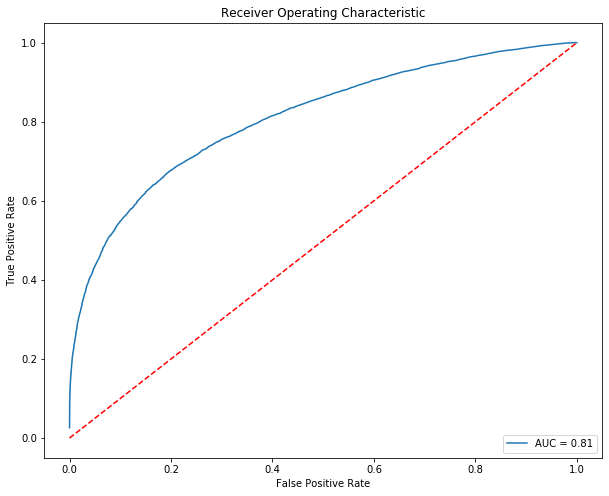

In [57]:
# 训练集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_train)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

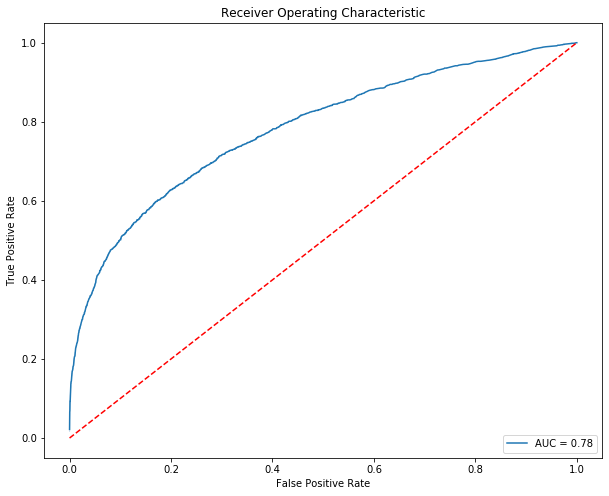

In [58]:
# 测试集评估
best_est_RF = RF_random.best_estimator_
y_pred = best_est_RF.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     12253
           1       0.57      0.38      0.46      2038

    accuracy                           0.87     14291
   macro avg       0.73      0.67      0.69     14291
weighted avg       0.85      0.87      0.86     14291



In [60]:
import joblib
joblib.dump(best_est_RF, 'best_est_RF.pkl')

['best_est_RF.pkl']

### XGB

In [61]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_jobs=-1) 
 
param_grid = {
                  'n_estimators' :[100,150,200,250,300],
                  "learning_rate" : [0.001,0.01,0.0001,0.05, 0.10 ],
                  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
                  "colsample_bytree" : [0.5,0.7],
                  'max_depth': [3,4,6,8,10,12,15,20,25,30]
              }
XGB_random = RandomizedSearchCV(XGB, param_distributions=param_grid, cv=5)
XGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

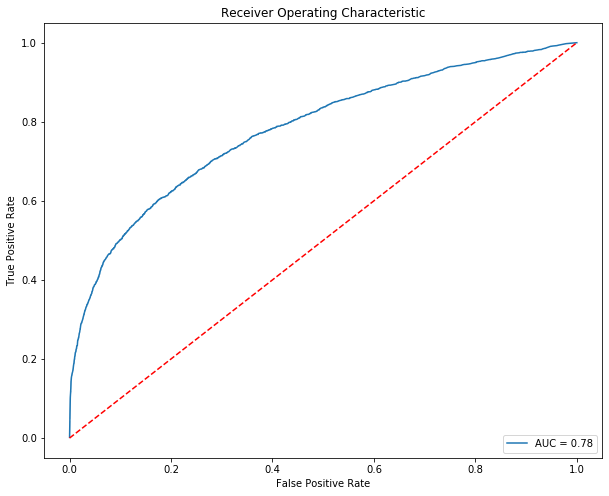

In [62]:
# 测试集评估
best_est_XGB = XGB_random.best_estimator_
y_pred = best_est_XGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     12253
           1       0.57      0.38      0.46      2038

    accuracy                           0.87     14291
   macro avg       0.74      0.67      0.69     14291
weighted avg       0.86      0.87      0.86     14291



In [64]:
joblib.dump(best_est_XGB, 'best_est_XGB.pkl')

['best_est_XGB.pkl']

### lgb

In [65]:
from lightgbm import LGBMClassifier

In [66]:
LGB = LGBMClassifier(boosting_type='gbdt',objective = 'binary',metric = 'auc',n_jobs=-1) 
param_grid = {
              'max_depth': [15, 20, 25, 30, 35],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'feature_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_fraction': [0.6, 0.7, 0.8, 0.9, 0.95],
              'bagging_freq': [2, 4, 5, 6, 8],
              'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
              'lambda_l2': [0, 10, 15, 35, 40],
              'cat_smooth': [1, 10, 15, 20, 35]
}
LGB_random = RandomizedSearchCV(LGB, param_distributions=param_grid, cv=5)
LGB_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='auc', objective='binary'),
                   param_distributions={'bagging_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'bagging_freq': [2, 4, 5, 6, 8],
                                        'cat_smooth': [1, 10, 15, 20, 35],
                                        'feature_fraction': [0.6, 0.7, 0.8, 0.9,
                                                             0.95],
                                        'lambda_l1': [0, 0.1, 0.4, 0.5, 0.6],
                                        'lambda_l2': [0, 10, 15, 35, 40],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [15, 20, 25, 30, 35]})

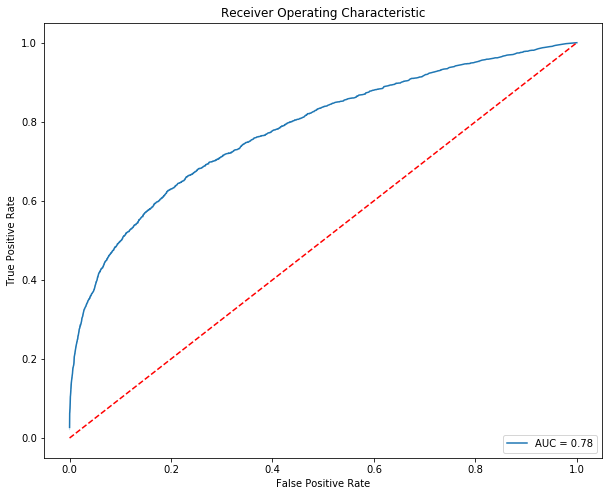

In [67]:
# 测试集评估
best_est_LGB = LGB_random.best_estimator_
y_pred = best_est_LGB.predict_proba(x_test)
y_pred = y_pred[:,1]
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
y_pred_class = list(map(lambda x:1 if x>=0.35 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93     12253
           1       0.57      0.37      0.45      2038

    accuracy                           0.87     14291
   macro avg       0.73      0.66      0.69     14291
weighted avg       0.85      0.87      0.86     14291



In [69]:
joblib.dump(best_est_LGB, 'best_est_LGB.pkl')

['best_est_LGB.pkl']

### 选XGB + LGB +RF融合

In [70]:
XGB_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [71]:
LGB_random.best_estimator_

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, cat_smooth=35,
               feature_fraction=0.8, lambda_l1=0.1, lambda_l2=10,
               learning_rate=0.05, max_depth=20, metric='auc',
               objective='binary')

In [72]:
RF_random.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=4, n_estimators=36)

In [73]:
y_pred = 0.4* best_est_XGB.predict_proba(x_test)[:,1] + 0.3*best_est_LGB.predict_proba(x_test)[:,1] + 0.3*best_est_RF.predict_proba(x_test)[:,1]

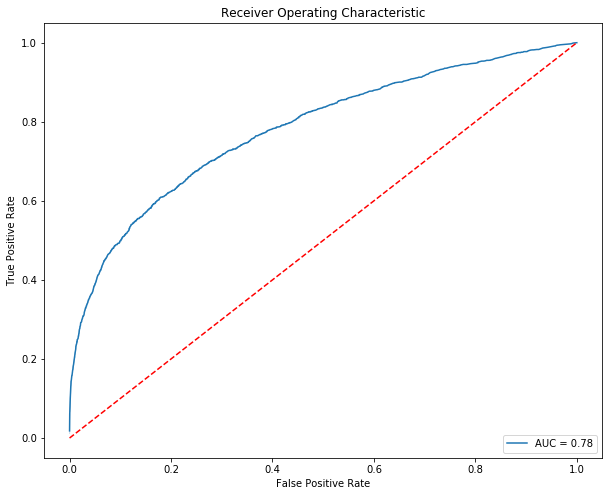

In [74]:
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
y_pred_class = list(map(lambda x:1 if x>=0.3 else 0, y_pred))
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     12253
           1       0.53      0.43      0.48      2038

    accuracy                           0.86     14291
   macro avg       0.72      0.68      0.70     14291
weighted avg       0.85      0.86      0.86     14291



### 转化为分数

In [76]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_rate,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label
0,28073,QMZZ015-横版CHL（口播）,16,2020-12-25,377.0,-0.067,-0.361,0.044,0.799,-0.684,-0.643,0.332,-0.239,0.0,0.785,1.857,6.0,2021-05-01,0
1,28164,GZDGB10,10,2020-12-27,25.0,0.903,-0.361,1.148,0.799,-0.179,-0.568,0.332,-0.631,0.0,0.785,-0.477,12.0,2021-05-01,0
3,28239,gzdgBG18,10,2020-12-29,827.0,0.348,0.666,0.044,0.799,-0.684,1.152,-0.264,1.146,0.0,0.785,-0.477,1688.0,2021-05-01,1
6,28460,GZDGS033-JXC+WZH开荒建造优化版-微信750x1334,16,2020-12-31,300.0,0.348,0.666,0.423,0.799,0.083,1.152,0.090,1.146,0.0,0.785,-0.009,0.0,2021-05-01,0
7,28681,GZDGS052-XY 3D仿014,16,2021-01-08,100.0,0.172,-0.361,0.044,-1.593,0.083,-0.425,-0.264,-0.510,0.0,-2.194,-0.009,15879.0,2021-05-01,1


In [77]:
feature = image_info_change[select_feature].drop('label',axis=1)
image_info_change['pred'] = 0.4* best_est_XGB.predict_proba(feature)[:,1] + 0.3*best_est_LGB.predict_proba(feature)[:,1] + 0.3*best_est_RF.predict_proba(feature)[:,1]

In [78]:
image_info_change.shape

(57161, 20)

In [79]:
image_info_change.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_rate,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,pred
0,28073,QMZZ015-横版CHL（口播）,16,2020-12-25,377.0,-0.067,-0.361,0.044,0.799,-0.684,-0.643,0.332,-0.239,0.0,0.785,1.857,6.0,2021-05-01,0,0.114953
1,28164,GZDGB10,10,2020-12-27,25.0,0.903,-0.361,1.148,0.799,-0.179,-0.568,0.332,-0.631,0.0,0.785,-0.477,12.0,2021-05-01,0,0.093650
3,28239,gzdgBG18,10,2020-12-29,827.0,0.348,0.666,0.044,0.799,-0.684,1.152,-0.264,1.146,0.0,0.785,-0.477,1688.0,2021-05-01,1,0.086754
6,28460,GZDGS033-JXC+WZH开荒建造优化版-微信750x1334,16,2020-12-31,300.0,0.348,0.666,0.423,0.799,0.083,1.152,0.090,1.146,0.0,0.785,-0.009,0.0,2021-05-01,0,0.060277
7,28681,GZDGS052-XY 3D仿014,16,2021-01-08,100.0,0.172,-0.361,0.044,-1.593,0.083,-0.425,-0.264,-0.510,0.0,-2.194,-0.009,15879.0,2021-05-01,1,0.746231


In [80]:
image_info_change.to_csv('./image_info_change.csv',index=0)

In [101]:
image_info_label.to_csv('./image_info_label.csv',index=0)

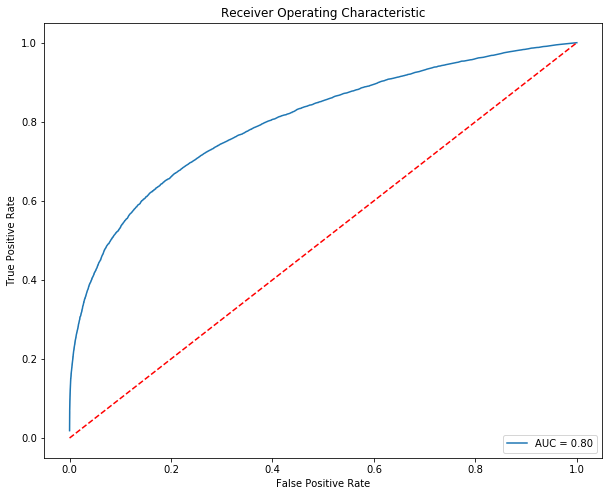

In [82]:
fpr,tpr,_ = roc_curve(image_info_change['label'], image_info_change['pred'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
y_pred_class = list(map(lambda x:1 if x>=0.3 else 0, image_info_change['pred']))
print(classification_report(image_info_change['label'], y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93     49133
           1       0.54      0.45      0.50      8028

    accuracy                           0.87     57161
   macro avg       0.73      0.70      0.71     57161
weighted avg       0.86      0.87      0.87     57161



In [84]:
def Prob2Score(prob, basePoint=600, PDO=30):
    #将概率转化成分数且为正整数
    y = np.log(prob/(1-prob))
    return (basePoint+int(PDO/np.log(2)*(y)))

In [85]:
Prob2Score(0.3)

564

In [86]:
image_info_change['score'] = image_info_change['pred'].apply(Prob2Score)

In [87]:
image_info_label['score'] = image_info_change['score']

In [88]:
image_info_label.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_rate,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,label,score
0,28073,QMZZ015-横版CHL（口播）,16,2020-12-25,377.0,4914.72,1.0,16.0,6.0,10.0,0.0625,307.170000,4914.72,0.0,0.001221,0.0455,6.0,2021-05-01,0,512
1,28164,GZDGB10,10,2020-12-27,25.0,647.31,1.0,2.0,6.0,8.0,0.5000,323.655000,647.31,0.0,0.009269,0.2727,12.0,2021-05-01,0,502
3,28239,gzdgBG18,10,2020-12-29,827.0,2594.60,0.0,17.0,0.0,16.0,0.0000,152.623529,inf,0.0,0.000000,0.2321,1688.0,2021-05-01,1,499
6,28460,GZDGS033-JXC+WZH开荒建造优化版-微信750x1334,16,2020-12-31,300.0,2426.12,0.0,10.0,0.0,4.0,0.0000,242.612000,inf,0.0,0.000000,0.1429,0.0,2021-05-01,0,482
7,28681,GZDGS052-XY 3D仿014,16,2021-01-08,100.0,3863.63,1.0,21.0,866.0,5.0,0.0476,183.982381,3863.63,0.0,0.224142,0.1892,15879.0,2021-05-01,1,646


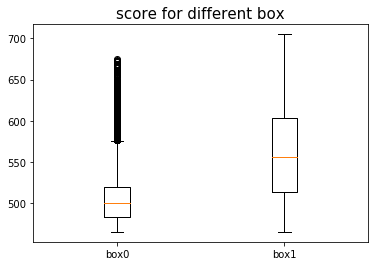

In [89]:
box0 = image_info_label[image_info_label['label']==0]['score']
box1 = image_info_label[image_info_label['label']==1]['score']
plt.title('score for different box',fontsize=15)
labels = 'box0','box1'
plt.boxplot([box0,box1],labels=labels)
plt.show()

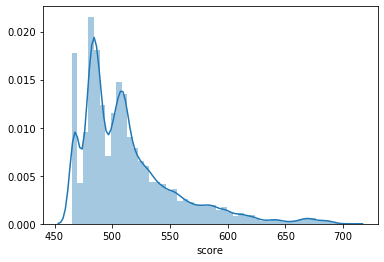

In [90]:
sns.distplot(image_info_label['score'])
plt.show()

In [91]:
image_info_label[image_info_label['score']>=600]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=600]['image_run_date_amount'].sum()

0.8648744401872361

In [92]:
image_info_label[image_info_label['score']<600]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<600]['image_run_date_amount'].sum()

0.2694751282926579

In [93]:
image_info_label['create_role_30_pay_sum'].sum()

168952095.0

In [94]:
image_info_label[image_info_label['score']<600]['create_role_30_pay_sum'].sum()

99791615.0

In [95]:
image_info_label['create_role_30_pay_sum'].sum() / image_info_label['image_run_date_amount'].sum()

0.375211981494767

In [96]:
image_info_label[image_info_label['score']>=600]['image_run_date_amount'].sum() / image_info_label['image_run_date_amount'].sum()

0.1775898142469316

In [97]:
image_info_label[image_info_label['score']>=660]['image_run_date_amount'].sum() / image_info_label['image_run_date_amount'].sum()

0.05275160742531236

In [98]:
print('高分区ROI：',image_info_label[image_info_label['score']>=660]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=660]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<660]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<660]['image_run_date_amount'].sum())

高分区ROI： 1.2219756305831333
低分区ROI： 0.3280562998922642


In [99]:
print('高分区ROI：',image_info_label[image_info_label['score']>=560]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',image_info_label[image_info_label['score']<560]['create_role_30_pay_sum'].sum() / image_info_label[image_info_label['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.5883450683454893
低分区ROI： 0.2059242364404389


In [100]:
image_info_label.drop(['image_id','create_role_30_pay_sum','label'],axis=1).corr()['score'].sort_values()

image_create_role_cost        -0.291077
image_create_role_pay_cost    -0.182248
media_id                      -0.017830
image_create_role_retain_1d    0.100789
image_source_total_num         0.235196
image_valid_source_rate        0.283008
image_source_num               0.364082
image_create_role_pay_rate     0.365761
image_create_role_num          0.379215
image_create_role_roi          0.445222
image_run_date_amount          0.472282
image_create_role_pay_num      0.495571
image_create_role_pay_sum      0.574909
score                          1.000000
Name: score, dtype: float64

### Test

In [986]:
test = pd.read_csv('./test_data.csv')

In [987]:
test.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,27955,QMZT004-CHL,16,2020-12-30,68,4129.26,0.0,19.0,0.0,5,0.0000,217.329474,0.00,0.0,0.0,0.0,0.0,0.000000,0.1200,21310.0,2021-03-06,3
1,28049,QMZZ003-横版xy-640x360 ＜100mb 30s,10,2020-12-25,35,2027.80,0.0,9.0,0.0,1,0.0000,225.311111,0.00,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,2021-03-06,3
2,28054,QMZZ007-竖版LL,10,2020-12-26,29,505.42,1.0,3.0,6.0,1,0.3333,168.473333,505.42,1.0,1.0,6.0,1.0,0.011871,0.3333,24.0,2021-03-06,3
3,28061,QMZZ012-竖版ZDC,10,2020-12-26,110,3373.11,1.0,22.0,6.0,3,0.0455,153.323182,3373.11,0.0,0.0,0.0,0.0,0.001779,0.1556,917.0,2021-03-06,3
4,28073,QMZZ015-横版CHL（口播）,10,2020-12-25,196,5987.62,1.0,48.0,6.0,4,0.0208,124.742083,5987.62,0.0,0.0,0.0,0.0,0.001002,0.0980,42.0,2021-03-06,3


In [988]:
test['create_role_30_pay_sum'].sum() / test['image_run_date_amount'].sum()

0.34809427673215937

In [633]:
test.shape

(6136, 22)

In [634]:
test_woe = test.copy()

In [635]:
def FE(df):
    df['image_create_role_cost'].replace(0, float('inf'), inplace=True)
    df['image_create_role_pay_cost'].replace(0, float('inf'), inplace=True)
    # 分桶定义（根据训练模型给出）
    pinf = float('inf')#正无穷大
    ninf = float('-inf')#负无穷大
    woex1 = [1.332, 1.202, 0.953, 0.845, 0.503, 0.216, 0.031, -0.363, -0.871, -1.702]
    woex2 = [0.896, -0.47, -1.078, -1.616, -2.105, -4.266]
    woex3 = [1.902, 1.227, 0.873, 0.771, 0.503, 0.215, 0.022, -0.394, -0.862, -1.784]
    woex4 = [1.0, -0.098, -0.943, -1.772, -2.692, -3.759, -5.138]
    woex5 = [0.552, -0.086, -0.573, -0.865, -1.345, -3.033]
    woex6 = [0.691, -0.919, -0.999, -0.956, -0.646]
    woex7 = [-0.609, -0.703, -0.521, -0.481, -0.139, 0.059, 0.359, 0.689, 1.315, 1.777]
    woex8 = [-1.338, -1.316, -1.277, -0.962, -0.781, -0.609, -0.363, -0.261, -0.112, -0.076, 0.243, 1.219]
    woex9 = [0.513, -0.717, -1.43, -1.04, -1.413, -1.256]
    woex10 = [0.443, -0.981, -1.658, -2.221, -2.823, -3.33]
    cutx1 = [ninf, 746.88, 1110.6, 1610.17, 2257.0, 3238.89, 4665.68, 6944.65, 11197.13, 24364.64, pinf]
    cutx2 = [ninf, 1, 3, 8, 12, 50, pinf]
    cutx3 = [ninf, 5.0, 9.0, 14.0, 21.0, 31.0, 48.0, 78.0, 138.0, 319.0, pinf]
    cutx4 = [ninf, 60, 100, 300, 600, 1000, 4000, pinf]
    cutx5 = [ninf, 1, 3, 6, 10, 50, pinf]
    cutx6 = [ninf, 0.01, 0.025, 0.05, 0.075, pinf]
    cutx7 = [ninf, 50, 100, 150, 200, 300, 400, pinf]
    cutx8 = [ninf, 2000, 3000, 4000, 6000, 8000, 10000, pinf]
    cutx9 = [ninf, 0.1, 0.2, 0.3, 0.4, 0.6, pinf]
    cutx10 = [ninf, 0.1, 0.2, 0.3, 0.4, 0.6, pinf]

    
    # 数据转化
    df['image_run_date_amount'] = change_woe(df['image_run_date_amount'], cutx1, woex1)
    df['image_create_role_pay_num'] = change_woe(df['image_create_role_pay_num'], cutx2, woex2)
    df['image_create_role_num'] = change_woe(df['image_create_role_num'], cutx3, woex3)
    df['image_create_role_pay_sum'] = change_woe(df['image_create_role_pay_sum'], cutx4,woex4)
    df['image_source_num'] = change_woe(df['image_source_num'], cutx5, woex5)
    df['image_create_role_pay_rate'] = change_woe(df['image_create_role_pay_rate'], cutx6,woex6)
    df['image_create_role_cost'] = change_woe(df['image_create_role_cost'], cutx7, woex7)
    df['image_create_role_pay_cost'] = change_woe(df['image_create_role_pay_cost'], cutx8,woex8)
#     df['image_valid_source_rate'] = change_woe(df['image_valid_source_rate'], cutx9,woex9)
#     df['image_pay_sum_ability'] = change_woe(df['image_pay_sum_ability'], cutx10, woex10)
#     df['image_pay_num_ability'] = change_woe(df['image_pay_num_ability'], cutx11, woex11)
    df['image_create_role_roi'] = change_woe(df['image_create_role_roi'], cutx9, woex9)
    df['image_create_role_retain_1d'] = change_woe(df['image_create_role_retain_1d'], cutx10, woex10) 

    return df

In [636]:
test_woe = FE(test_woe)

In [637]:
test_woe.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win
0,27955,QMZT004-CHL,16,2020-12-30,68,0.216,0.896,0.771,1.0,-0.573,0.691,-0.139,-0.363,0.0,0.0,0.0,0.0,0.513,-0.981,21310.0,2021-03-06,3
1,28049,QMZZ003-横版xy-640x360 ＜100mb 30s,10,2020-12-25,35,0.845,0.896,0.873,1.0,-0.086,0.691,-0.139,-0.363,0.0,0.0,0.0,0.0,0.513,0.443,0.0,2021-03-06,3
2,28054,QMZZ007-竖版LL,10,2020-12-26,29,1.332,-0.470,1.902,1.0,-0.086,-0.646,-0.481,-1.338,1.0,1.0,6.0,1.0,0.513,-2.221,24.0,2021-03-06,3
3,28061,QMZZ012-竖版ZDC,10,2020-12-26,110,0.216,-0.470,0.503,1.0,-0.573,-0.999,-0.481,-1.277,0.0,0.0,0.0,0.0,0.513,-0.981,917.0,2021-03-06,3
4,28073,QMZZ015-横版CHL（口播）,10,2020-12-25,196,0.031,-0.470,0.022,1.0,-0.573,-0.919,-0.521,-0.962,0.0,0.0,0.0,0.0,0.513,0.443,42.0,2021-03-06,3


In [638]:
select_feature = ['image_run_date_amount', 'image_create_role_pay_num',
                  'image_create_role_num', 'image_create_role_pay_sum',
                  'image_source_num', 'image_create_role_pay_rate',
                  'image_create_role_cost', 'image_create_role_pay_cost',
                  'image_create_role_roi','image_create_role_retain_1d']


feature = test_woe[select_feature]
test_woe['pred'] = 0.4 * best_est_XGB.predict_proba(feature)[:, 1] + 0.3 * best_est_LGB.predict_proba(
    feature)[:, 1] + 0.3 * best_est_RF.predict_proba(feature)[:, 1]
test_woe['score'] = test_woe['pred'].apply(Prob2Score)
test['score'] = test_woe['score']

In [639]:
test.sort_values('score',ascending=False)

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win,score
879,30522,QMZZ483-横版ZDC,10,2021-03-04,18,11611.57,5.0,56.0,3612.0,9,0.0893,207.349464,2322.314000,9.0,1.0,401.333333,0.5556,0.311069,0.2034,34908.0,2021-03-09,3,712
5584,30889,GZDGS209-CYS 建造升级 3D,16,2021-03-11,22,5649.29,2.0,16.0,2214.0,5,0.1250,353.080625,2824.645000,0.0,0.0,0.000000,0.0000,0.391908,0.4375,23253.0,2021-03-25,3,709
5942,30889,GZDGS209-CYS 建造升级 3D,16,2021-03-11,22,5649.29,2.0,16.0,2214.0,5,0.1250,353.080625,2824.645000,0.0,0.0,0.000000,0.0000,0.391908,0.4211,23253.0,2021-03-26,3,709
4136,30042,QMZZ320-横版LL（TT）,10,2021-02-20,47,25095.04,7.0,155.0,5726.0,4,0.0452,161.903484,3585.005714,0.0,0.0,0.000000,0.0000,0.228173,0.2949,12007.0,2021-03-21,3,708
3827,30438,GZDGS172-LZQ+XF 解说海岛,10,2021-03-01,348,70845.79,19.0,528.0,7619.0,35,0.0360,134.177633,3728.725789,0.0,0.0,0.000000,0.0000,0.107543,0.1724,25643.0,2021-03-20,3,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4554,30881,QMZZ518-横版LL（3D原创3渲染2）（TT）,16,2021-03-11,53,1190.89,0.0,7.0,0.0,1,0.0000,170.127143,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0000,0.0,2021-03-22,3,455
4221,30881,QMZZ518-横版LL（3D原创3渲染2）（TT）,16,2021-03-11,53,1190.89,0.0,7.0,0.0,1,0.0000,170.127143,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0000,0.0,2021-03-21,3,455
4625,31136,QMZZ575-竖版ZDC,10,2021-03-20,2,1144.05,0.0,7.0,0.0,1,0.0000,163.435714,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0000,0.0,2021-03-22,3,455
4309,31136,QMZZ575-竖版ZDC,10,2021-03-20,2,1144.05,0.0,7.0,0.0,1,0.0000,163.435714,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0000,0.0,2021-03-21,3,455


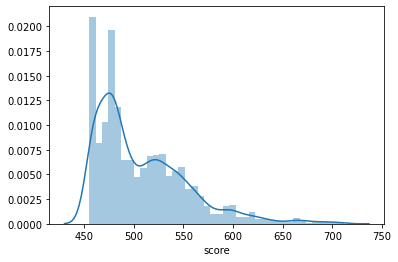

In [640]:
sns.distplot(test['score'])
plt.show()

In [641]:
test[test['score']>=600]['create_role_30_pay_sum'].sum() / test[test['score']>=600]['image_run_date_amount'].sum()

0.5088505179138543

In [642]:
test[test['score']<600]['create_role_30_pay_sum'].sum() / test[test['score']<600]['image_run_date_amount'].sum()

0.2626348183409853

In [643]:
print('高分区ROI：',test[test['score']>=560]['create_role_30_pay_sum'].sum() / test[test['score']>=560]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<560]['create_role_30_pay_sum'].sum() / test[test['score']<560]['image_run_date_amount'].sum())

高分区ROI： 0.4637465296830412
低分区ROI： 0.1785639594848544


In [644]:
print('高分区ROI：',test[test['score']>=540]['create_role_30_pay_sum'].sum() / test[test['score']>=540]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<540]['create_role_30_pay_sum'].sum() / test[test['score']<540]['image_run_date_amount'].sum())

高分区ROI： 0.4209155255273085
低分区ROI： 0.13466795348911828


In [645]:
print('高分区ROI：',test[test['score']>=520]['create_role_30_pay_sum'].sum() / test[test['score']>=520]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<520]['create_role_30_pay_sum'].sum() / test[test['score']<520]['image_run_date_amount'].sum())

高分区ROI： 0.3878062797934832
低分区ROI： 0.10088368544180555


In [646]:
print('高分区ROI：',test[test['score']>=500]['create_role_30_pay_sum'].sum() / test[test['score']>=500]['image_run_date_amount'].sum())
print('低分区ROI：',test[test['score']<500]['create_role_30_pay_sum'].sum() / test[test['score']<500]['image_run_date_amount'].sum())

高分区ROI： 0.36841577876935167
低分区ROI： 0.0784536792522435


In [647]:
print('全test样本的ROI为：',test['create_role_30_pay_sum'].sum() / test['image_run_date_amount'].sum())

全test样本的ROI为： 0.34809427673215937


In [648]:
print('高分区消耗金额占比',test[test['score']>=560]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.5944624074658222


In [649]:
print('高分区消耗金额占比',test[test['score']>=560]['image_run_date_amount'].sum() / test['image_run_date_amount'].sum())

高分区消耗金额占比 0.5944624074658222


In [650]:
test.head()

,image_id,image_name,media_id,image_launch_time,image_source_total_num,image_run_date_amount,image_create_role_pay_num,image_create_role_num,image_create_role_pay_sum,image_source_num,image_create_role_pay_rate,image_create_role_cost,image_create_role_pay_cost,image_valid_source_num,image_valid_source_rate,image_pay_sum_ability,image_pay_num_ability,image_create_role_roi,image_create_role_retain_1d,create_role_30_pay_sum,model_run_datetime,data_win,score
0,27955,QMZT004-CHL,16,2020-12-30,68,4129.26,0.0,19.0,0.0,5,0.0000,217.329474,0.00,0.0,0.0,0.0,0.0,0.000000,0.1200,21310.0,2021-03-06,3,505
1,28049,QMZZ003-横版xy-640x360 ＜100mb 30s,10,2020-12-25,35,2027.80,0.0,9.0,0.0,1,0.0000,225.311111,0.00,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,2021-03-06,3,462
2,28054,QMZZ007-竖版LL,10,2020-12-26,29,505.42,1.0,3.0,6.0,1,0.3333,168.473333,505.42,1.0,1.0,6.0,1.0,0.011871,0.3333,24.0,2021-03-06,3,527
3,28061,QMZZ012-竖版ZDC,10,2020-12-26,110,3373.11,1.0,22.0,6.0,3,0.0455,153.323182,3373.11,0.0,0.0,0.0,0.0,0.001779,0.1556,917.0,2021-03-06,3,546
4,28073,QMZZ015-横版CHL（口播）,10,2020-12-25,196,5987.62,1.0,48.0,6.0,4,0.0208,124.742083,5987.62,0.0,0.0,0.0,0.0,0.001002,0.0980,42.0,2021-03-06,3,483


In [144]:
test.to_csv('./test_result.csv')